# 2x2 fuel assembly

This example is a continuation of the first example. It extends the previous case with a pool (surrounded by air), a lead absorber and a collimator. Other materials and pins are the same, hence we go through that part quickly.

Let's import feign first.

In [1]:
from feign.geometry import *
from feign.blocks import *

## Materials

Then, define four Material() objects, water and uranium-dioxide, zirconium and helium, and place them into a Materials() container.

In [2]:
uo2=Material('1')
uo2.set_density(10.5) #g/cm3

he=Material('2')
he.set_density(0.00561781)


zr=Material('3')
zr.set_density(6.52)


h2o=Material('4')
h2o.set_density(1.0)

air=Material('5')
air.set_density(0.001225)

lead=Material('6')  
lead.set_density(11.34)

uo2.set_path(('/dataFin/UO2.dat',1))
he.set_path(('/dataFin/He.dat',1))
zr.set_path(('/dataFin/Zr.dat',1))
h2o.set_path(('/dataFin/H2O.dat',1))
air.set_path(('/dataFin/Air.dat',1))
lead.set_path(('/dataFin/Pb.dat',1))


ex2_materials=Materials(uo2,he,zr,h2o,air,lead) #Adding lead as well.


## Pins

In this example we assume that we are going to have only one pin type, the fuel pin. The uranium-dioxide region has 0.5 cm radius, that is followed by an 0.01 cm thick helium gap, and finally an 0.1 cm thick zirconium cladding. The pin has to be added to a Pins() container.

In [6]:
fuel=Pin('1')
fuel.add_region(uo2,0.5) #cm
fuel.add_region(he,0.51)
fuel.add_region(zr,0.61)

ex2_pins=Pins(fuel)


## Assembly

Now we can build a 2x2 assembly from the pin. We need to set the pitch of the lattice, the source, and the coolant. And we have to define a fuelmap based on the pinIDs. 
We will also define a pool with a Rectangle (and we will rotate it with 45 degrees, thus the corner of the assembly will face the wall).

Note the middle of the assembly is always considered as being placed at (0,0).


In [14]:
assy=Assembly(2,2)
assy.set_pitch(1.3)
assy.set_source(uo2)
assy.set_coolant(h2o)
assy.set_pins(ex2_pins)

pool=Rectangle(Point(-4,-4),Point(-4,4),Point(4,4),Point(4,-4)).rotate(45)

fuelmap=[['1','1'],
         ['1','1']]


assy.set_pool(pool)
assy.set_surrounding(air)
assy.set_fuelmap(fuelmap)

## Detector

At least one detector has to be defined in the problem. Let us place one at (5,5), facing the corner of the assembly.

We also define a collimator between the fuel and the detector.

In [17]:
det=Detector('D')
det.set_location(Point(5, 5))

coll=Collimator()
coll.set_back(Segment(Point(2.0,1.0),Point(2.0,-1.0)).rotate(45))
coll.set_front(Segment(Point(3.5,0.2),Point(3.5,-0.2)).rotate(45))
det.set_collimator(coll)
ex2_detectors=Detectors(det)

## Absorber

We can define an absorber with a Rectangle or a Circle object. We have to set the material of the absorber and the material which is accommodating the absorber. Then we include the absorber in an Absorbers container.

In [26]:
lead2mm=Absorber('lead2mm')
lead2mm.set_form(Rectangle(Point(4.5, -2),Point(4.5, 2),Point(4.7, 2),Point(4.7, -2)).rotate(45))
lead2mm.set_material(lead)
lead2mm.set_accommat(air)

ex2_absorbers=Absorbers(lead2mm)


## Experiment

Finally we re ready to perform define our experiment.

In [27]:
ex2=Experiment()
ex2.set_assembly(assy)
ex2.set_detectors(ex2_detectors)
ex2.set_materials(ex2_materials)
ex2.set_absorbers(ex2_absorbers)

elines=['0.5','0.6','0.8','1.0','1.5','2.0']
ex2.set_elines(elines)

We can plot the geometry with the Plot() method. If the color attribute is set previously for the materials, then it is used for the plot, otherwise, the method will randomly assign colours for each material (the detector is set to white and the collimator is set to gray).

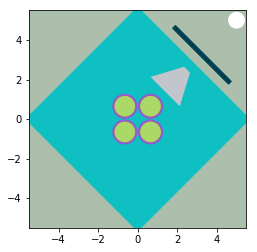

In [28]:
ex2.Plot(dpi=600,out=None,xl=[-5.5,5.5],yl=[-5.5,5.5],detectorSize=0.4)

When we run the experiment, we do not get any warnings, because everything is set.

In [30]:
ex2.Run()

Detector D is being calculated
0.5
0.6
0.8
1.0
1.5
2.0


## Plotting the results

First let's just print the distance travelled by the ray to the detector. from each pin We would expect, that two pins are not seen by the detector due to the collimator. Indeed we see that the ray emitted from those pins travel infinite distance.

Visualizing the data is not that interesting for this example.

In [32]:
ex2.dTmap['D']['1'] #to detector D, through matID '1'

[[inf, 0.5000000000000001], [1.5000000000000002, inf]]

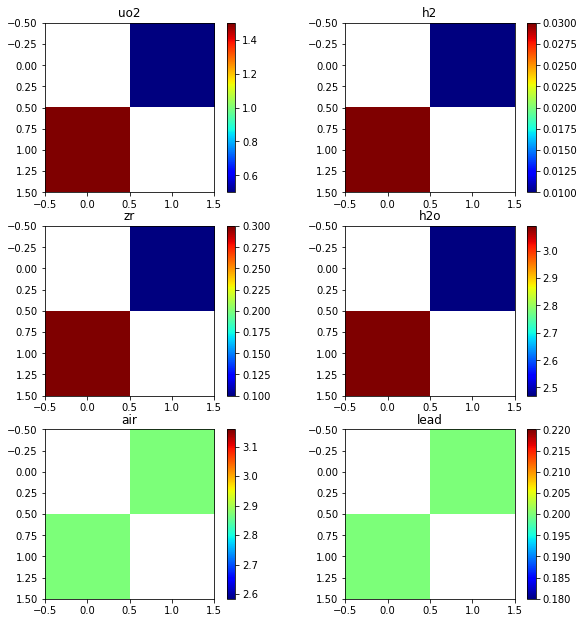

In [39]:
plt.figure()
plt.subplot(321)
plt.imshow(ex2.dTmap['D']['1'],cmap='jet')
plt.title('uo2')
plt.colorbar()

plt.subplot(322)
plt.imshow(ex2.dTmap['D']['2'],cmap='jet')
plt.title('h2')
plt.colorbar()

plt.subplot(323)
plt.imshow(ex2.dTmap['D']['3'],cmap='jet')
plt.title('zr')
plt.colorbar()

plt.subplot(324)
plt.imshow(ex2.dTmap['D']['4'],cmap='jet')
plt.title('h2o')
plt.colorbar()

plt.subplot(325)
plt.imshow(ex2.dTmap['D']['5'],cmap='jet')
plt.title('air')
plt.colorbar()

plt.subplot(326)
plt.imshow(ex2.dTmap['D']['6'],cmap='jet')
plt.title('lead')
plt.colorbar()

plt.subplots_adjust(bottom=0.1, right=1.4, top=2.1)

plt.show()

## Geometric efficiency and pinwise contribution

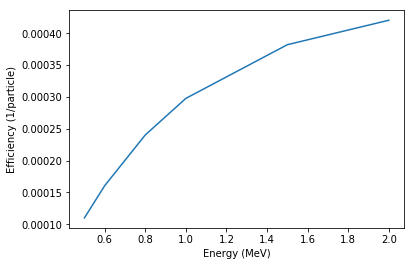

In [40]:
plt.figure()
plt.plot(ex2.elines,ex2._geomEff)
plt.xlabel('Energy (MeV)')
plt.ylabel('Efficiency (1/particle)')
plt.show()

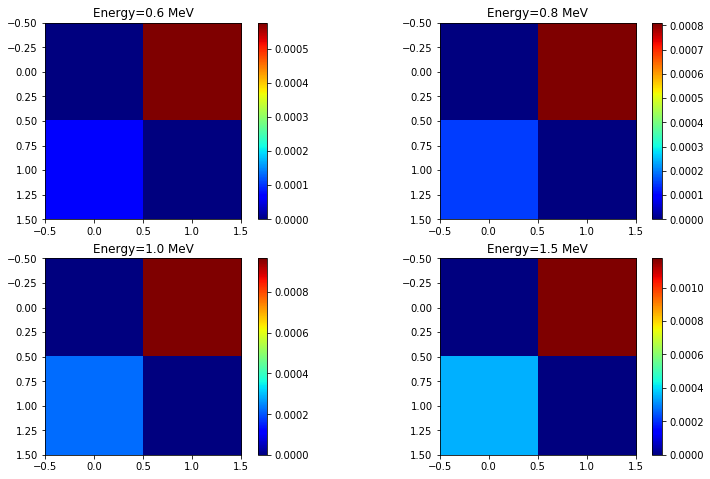

In [41]:
plt.figure()
plt.subplot(221)
plt.imshow(ex2._contributionMap['0.6'],cmap='jet')
plt.title('Energy=0.6 MeV')
plt.colorbar()

plt.subplot(222)
plt.imshow(ex2._contributionMap['0.8'],cmap='jet')
plt.title('Energy=0.8 MeV')
plt.colorbar()

plt.subplot(223)
plt.imshow(ex2._contributionMap['1.0'],cmap='jet')
plt.title('Energy=1.0 MeV')
plt.colorbar()

plt.subplot(224)
plt.imshow(ex2._contributionMap['1.5'],cmap='jet')
plt.title('Energy=1.5 MeV')
plt.colorbar()
plt.subplots_adjust(bottom=0.1, right=1.8, top=1.6)

plt.show()